# AIRBNB NYC

## IMPORTAMOS LOS DATOS

In [2]:
# importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
air_nyc = pd.read_csv('AB_NYC_2019.csv')

In [4]:
# Exploramos el dataset
air_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#Tamaño del dataframe
air_nyc.shape

(48895, 16)

In [6]:
# Ver tipos de variables
air_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Ver si hay valores nulos
air_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Se puede observar que hay 16 apartamentos que no tiene nombre, 21 que no tienen nombre del huesped y luego tenemos 10052 apartamentos sin reviews ni reviews en el ultimo mes. No faltan datos significativos.

In [8]:
# Informe estadistico 
air_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### EDA más especifico

El objetivo es hacernos una idea de como están distribuidos los precios, donde hay más apartamentos, qué tipos de apartamentos hay, cuales son los mejor valorados, los que peor, etc.

In [9]:
# Analicemos la distribucion de los precios
air_nyc['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

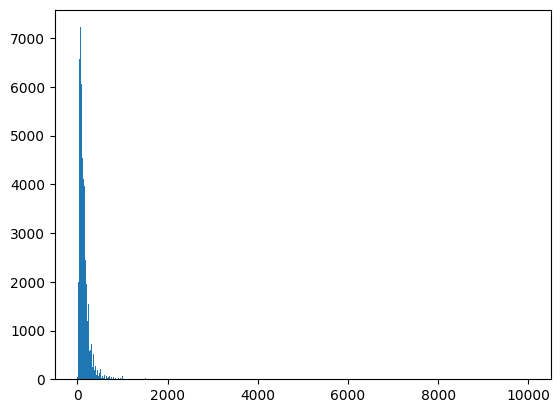

In [10]:
# Analisis gráfico de la distribución
plt.hist(air_nyc['price'],bins=500)
plt.show()

Vemos que hay algunos precios que son muy altos que distorsionan el análisis. Vamos a acotar esos precios.

<Axes: ylabel='price'>

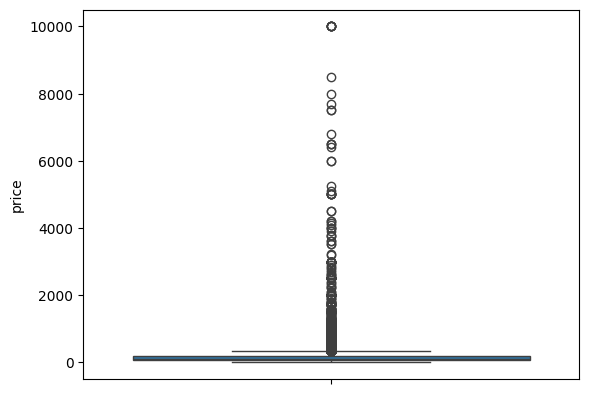

In [11]:
sns.boxplot(air_nyc['price'])

In [12]:
# Precios Menores de 500$ la noche
air_nyc_filtered = air_nyc[air_nyc['price'] <=500]

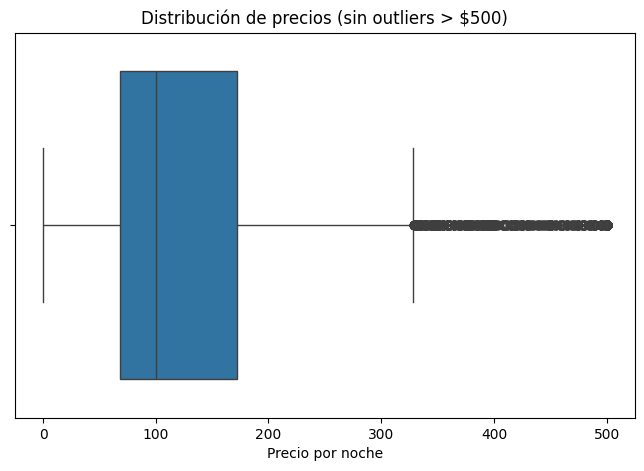

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=air_nyc_filtered['price'])
plt.title("Distribución de precios (sin outliers > $500)")
plt.xlabel("Precio por noche")
plt.show()


## Análisis por barrio

In [14]:
# Analisis de precios medios por barrio
air_nyc.groupby('neighbourhood_group')['price'].mean().sort_values(ascending= False)

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

## Analisis por tipo de alojamiento

In [15]:
air_nyc.groupby('room_type')['availability_365'].mean()


room_type
Entire home/apt    111.920304
Private room       111.203933
Shared room        162.000862
Name: availability_365, dtype: float64

# Análisis de ingreso estimado por zona y tipo

In [17]:
#crear ingreso estimado anual
air_nyc['estimated_income'] = air_nyc['price'] * air_nyc['reviews_per_month'].fillna(0) * 12

In [18]:
# Análisis de ingreso estimado por zona y tipo
group_income = air_nyc.groupby(['neighbourhood_group', 'room_type'])['estimated_income'].mean().reset_index()

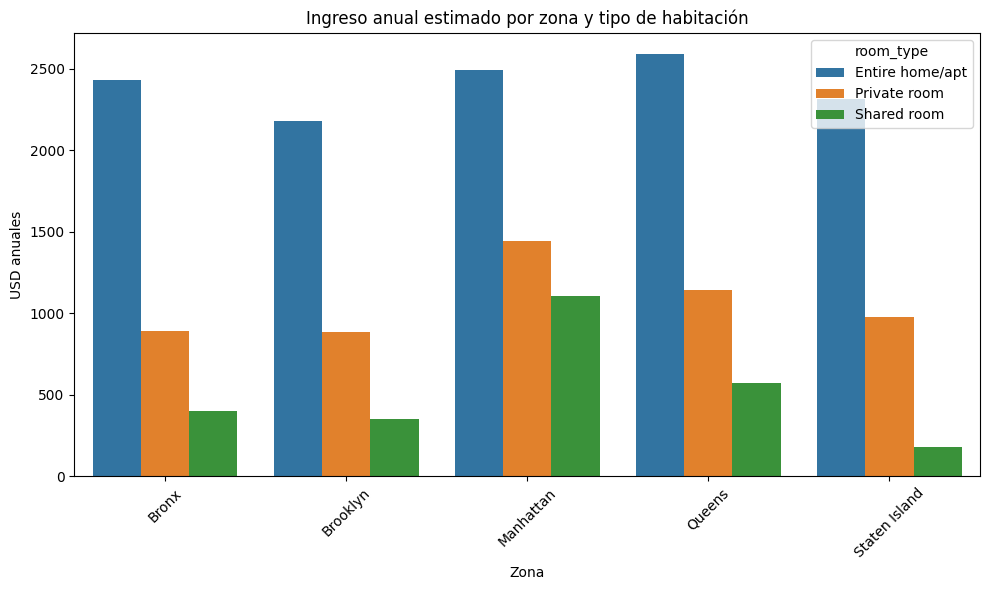

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group_income, x='neighbourhood_group', y='estimated_income', hue='room_type')
plt.title("Ingreso anual estimado por zona y tipo de habitación")
plt.ylabel("USD anuales")
plt.xlabel("Zona")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [20]:
# Top 10 alojamientos más rentables
top_income = air_nyc[['name', 'neighbourhood_group', 'room_type', 'price', 'reviews_per_month', 'estimated_income']]\
                .sort_values(by='estimated_income', ascending=False).head(10)

In [21]:
print("Top 10 alojamientos más rentables:")
print(top_income)

Top 10 alojamientos más rentables:
                                                    name neighbourhood_group  \
45666                               Gem of east Flatbush            Brooklyn   
30824  Designer's Beautiful 2BR Apartment in NOLITA/SOHO           Manhattan   
46937  ★ AMAZING★  TIME SQUARE/ 2 Bedroom 3 Bed Apart...           Manhattan   
45031  Huge Family Apt in Times Square - private elev...           Manhattan   
42075  Enjoy great views of the City in our Deluxe Room!           Manhattan   
42076           Great Room in the heart of Times Square!           Manhattan   
45610   Amazing Townhouse Experience with Private Garden           Manhattan   
43009    Midtown Manhattan great location (Gramacy park)           Manhattan   
13724    Ultra-Modern 6-bedroom House (Great for Groups)           Manhattan   
24219   Luxury House in Safe Area, 30 Min to Time Square              Queens   

             room_type  price  reviews_per_month  estimated_income  
45666     Priva

## Mapa de calor de la ciudad de New York

Como se dispone de las coordenadas de longitud y latitud de los apartamentos, vamos a aprovechar para hacer un mapa de calor con la libreria folium.

In [22]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[40.75, -73.98], zoom_start=12)
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in air_nyc.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('mapa_nyc.html')


In [ ]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install nbformat


Defaulting to user installation because normal site-packages is not writeable


In [24]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'  # O usa 'notebook' si estás en Jupyter

fig = px.density_mapbox(
    air_nyc,  # tu DataFrame
    lat='latitude', 
    lon='longitude', 
    z='price',
    radius=10,
    center=dict(lat=40.75, lon=-73.98),
    zoom=10,
    mapbox_style="carto-positron"
)

fig.show()
# 

C:\Users\Portatil\AppData\Local\Temp\ipykernel_10184\2772315240.py:6: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [29]:
# 1. Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# 2. Eliminar outliers extremos
air_nyc_no_outliers = air_nyc[air_nyc['price'] <= 500].dropna(subset=['reviews_per_month']).copy()

# 3. Variables categóricas a codificar
categorical_cols = ['neighbourhood_group', 'room_type']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = pd.DataFrame(
    encoder.fit_transform(air_nyc_no_outliers[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=air_nyc_no_outliers.index
)

# 4. Unir con variables numéricas
numerical_cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
X = pd.concat([air_nyc_no_outliers[numerical_cols], encoded_cols], axis=1)
y = air_nyc_no_outliers['price']

# 5. Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Evaluar modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae:.2f} $")


Error absoluto medio (MAE): 45.50 $


## Observaciones

El 80% de los apartamentos tiene un precio menor a 200 $

Manhattan es el distrito más caro con diferencia

Los alojamientos privados tienen menor disponibilidad

Se pueden usar modelos predictivos con MAE ≈ 45 $ para recomendar tarifas

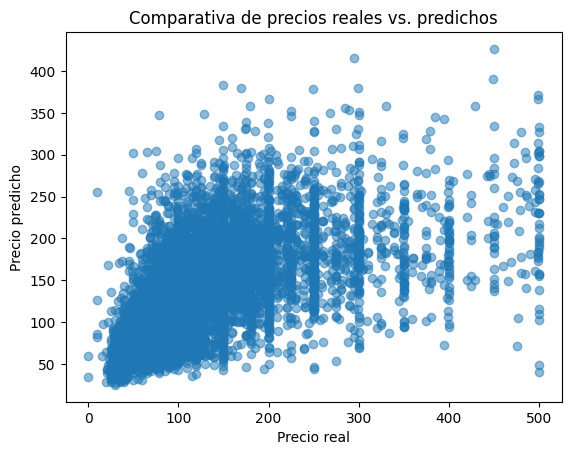

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparativa de precios reales vs. predichos")
plt.show()


In [27]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.8 MB 12.5 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.8 MB 12.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 11.8 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   --------------------------------------- 731.2/731.2 kB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/25.2 MB 12.8 MB/s eta 0:00:02
   -------- ------------------------------- 5.2/25.2 MB 12.8 MB/s eta 0:00:02
   ------------ --------------------------- 7.6/25.2 MB 12.0 MB/s eta 0:00:02
   ----------